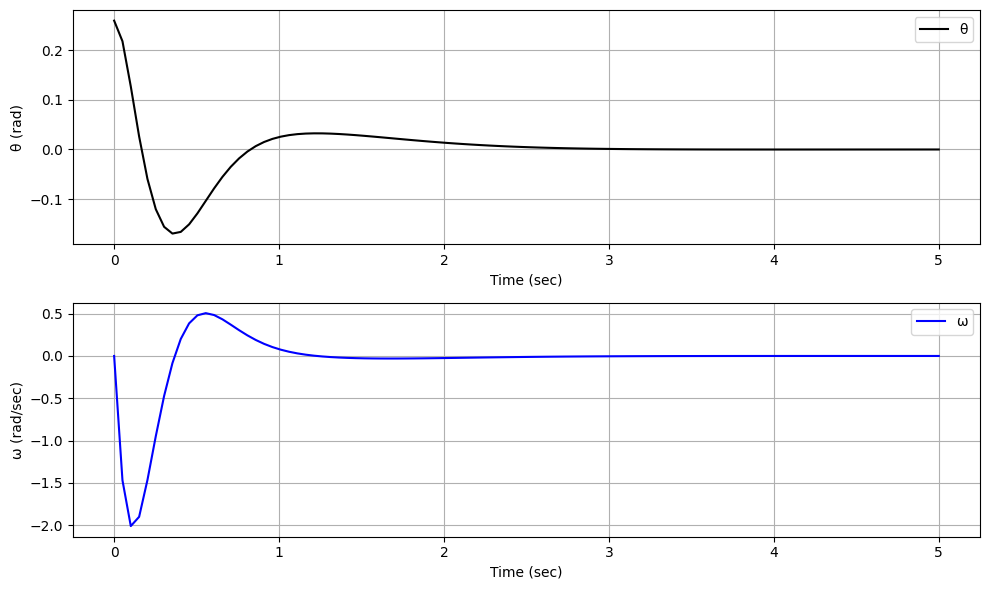

In [1]:
import numpy as np
from scipy.integrate import odeint

def inverted_pendulum_luenburger(X, t):
    # State variables: x=[x; v; θ; ω], psi=X[4]
    x = X[:4]
    psi = X[4]
    
    g = 9.8
    l = 1.0
    m = 1.0
    M = 1.0
    
    # Define the state feedback gain matrix
    k = np.array([-40.0, -37.37, -190.6669, -54.7283])
    
    d1 = M + m * (1 - np.cos(x[2])**2)
    d2 = l * d1
    
    # Calculate dpsi (observer dynamics)
    dpsi = -40.0 * x[0] - 37.37 * x[1] - 405.9 * x[2] - 58.73 * psi
    
    # Calculate estimated angular velocity (omega_h)
    omega_h = psi + 4 * x[3]
    
    # Construct the augmented state vector xh
    xh = np.array([x[0], x[1], x[2], omega_h])
    
    # Calculate state feedback F
    F = -np.dot(k, x)
    
    # Dynamics of the inverted pendulum
    xp = np.array([
        x[1],
        (F + m * l * x[3]**2 * np.sin(x[2]) - m * g * np.sin(x[2]) * np.cos(x[2])) / d1,
        x[3],
        (-F * np.cos(x[2]) - m * l * x[3]**2 * np.sin(x[2]) * np.cos(x[2])
         + (M + m) * g * np.sin(x[2])) / d2
    ])
    
    # Combine dynamics with observer dynamics dpsi
    Xp = np.concatenate([xp, [dpsi]])
    
    return Xp

# Simulation parameters
tspan = np.linspace(0, 5, 100)  # Time span for the simulation
x0 = [0, 0, 0.26, 0, 0]  # Initial conditions: [x, v, θ, ω, psi]

# Integrate the system of differential equations using odeint
X = odeint(inverted_pendulum_luenburger, x0, tspan)

# Extract states
x = X[:, 0]
v = X[:, 1]
theta = X[:, 2]
omega = X[:, 3]

# Plotting (example plot for θ and ω)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(tspan, theta, 'k', label='θ')
plt.xlabel('Time (sec)')
plt.ylabel('θ (rad)')
plt.grid()
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(tspan, omega, 'b', label='ω')
plt.xlabel('Time (sec)')
plt.ylabel('ω (rad/sec)')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()
